In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [4]:
# loading the data from csv file to pandas dataframe
car_dataset=pd.read_csv('/content/car data.csv')

In [5]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#Checking for outliers
car_dataset['Present_Price'].describe()

,Present_Price
count,301.000000
mean,7.628472
std,8.644115
min,0.320000
25%,1.200000
50%,6.400000
75%,9.900000
max,92.600000


In [7]:
car_dataset['Present_Price'].sort_values().reset_index()>60

,index,Present_Price
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
296,False,False
297,True,False
298,True,False
299,True,False


In [8]:
#removing outliers
car_dataset = car_dataset[car_dataset['Present_Price'] < 60]

In [9]:
car_dataset['Present_Price'].describe()

,Present_Price
count,300.000000
mean,7.345233
std,7.123373
min,0.320000
25%,1.200000
50%,6.250000
75%,9.862500
max,36.230000


In [10]:
#Checking for outliers
car_dataset['Selling_Price'].describe()

,Selling_Price
count,300.000000
mean,4.560167
std,4.778361
min,0.100000
25%,0.875000
50%,3.555000
75%,6.000000
max,33.000000


In [11]:
car_dataset['Selling_Price'].sort_values().reset_index()>25

,index,Selling_Price
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
295,True,False
296,True,False
297,True,False
298,True,False


In [12]:
#removing outliers
car_dataset = car_dataset[car_dataset['Selling_Price'] < 25]

In [13]:
car_dataset['Selling_Price'].describe()

,Selling_Price
count,299.000000
mean,4.465050
std,4.492894
min,0.100000
25%,0.850000
50%,3.510000
75%,6.000000
max,23.500000


In [14]:
#Checking for outliers
car_dataset['Kms_Driven'].describe()

,Kms_Driven
count,299.000000
mean,36913.408027
std,38903.318401
min,500.000000
25%,15000.000000
50%,32000.000000
75%,48383.500000
max,500000.000000


In [15]:
car_dataset['Kms_Driven'].sort_values().reset_index()>150000

,index,Kms_Driven
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
294,False,False
295,False,False
296,False,True
297,False,True


In [16]:
#removing outliers
car_dataset = car_dataset[car_dataset['Kms_Driven'] < 150000]

In [17]:
car_dataset['Kms_Driven'].sort_values().reset_index()<1000

,index,Kms_Driven
0,True,True
1,True,True
2,True,False
3,True,False
4,True,False
...,...,...
291,True,False
292,True,False
293,True,False
294,True,False


In [18]:
#removing outliers
car_dataset = car_dataset[car_dataset['Kms_Driven'] > 1000]

In [19]:
car_dataset['Kms_Driven'].describe()

,Kms_Driven
count,293.000000
mean,34556.085324
std,24432.174970
min,1200.000000
25%,15001.000000
50%,32000.000000
75%,47000.000000
max,142000.000000


In [20]:
# checking the number of rows and columns
car_dataset.shape

(293, 9)

In [21]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       293 non-null    object 
 1   Year           293 non-null    int64  
 2   Selling_Price  293 non-null    float64
 3   Present_Price  293 non-null    float64
 4   Kms_Driven     293 non-null    int64  
 5   Fuel_Type      293 non-null    object 
 6   Seller_Type    293 non-null    object 
 7   Transmission   293 non-null    object 
 8   Owner          293 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 22.9+ KB


In [22]:
# checking the number of missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [23]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    234
Diesel     57
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        192
Individual    101
Name: count, dtype: int64
Transmission
Manual       256
Automatic     37
Name: count, dtype: int64


In [24]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [25]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


**Splitting the data and Target**

In [26]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [27]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [28]:
Y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


**Splitting train and test data**

In [29]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

**Model Training**

Linear Regression

In [30]:
#loading the linear regression model
lin_reg_model=LinearRegression()

In [31]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

**Model Evaluation**

In [32]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [33]:
#R Squared Error
error_score =metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8969776069148961


**Visualize the actual prices and Predicted prices**

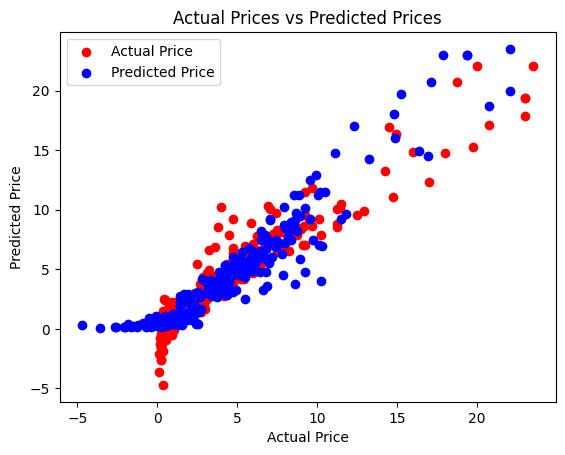

In [34]:
plt.scatter(Y_train, training_data_prediction, color='red', label='Actual Price')
plt.scatter(training_data_prediction, Y_train, color='blue', label='Predicted Price')

# Adding labels and title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

# Adding a legend to distinguish the points
plt.legend()

# Display the plot
plt.show()

In [35]:
#prediction on Testing data
testing_data_prediction= lin_reg_model.predict(X_test)

In [36]:
#R Squared Error
error_score= metrics.r2_score(Y_test,testing_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7260060147085707


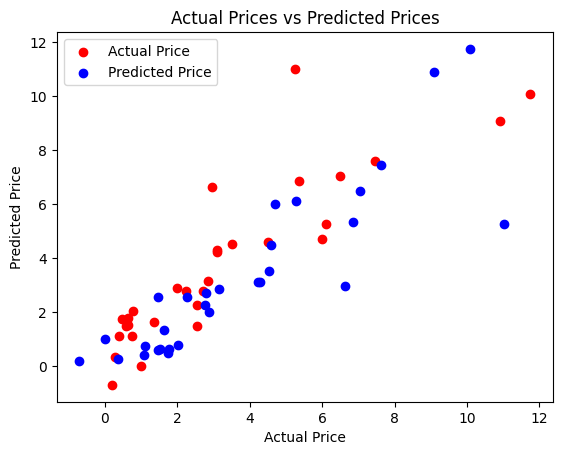

In [37]:
plt.scatter(Y_test, testing_data_prediction, color='red', label='Actual Price')
plt.scatter(testing_data_prediction, Y_test, color='blue', label='Predicted Price')

# Adding labels and title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

# Adding a legend to distinguish the points
plt.legend()

# Display the plot
plt.show()

**Making a Predictive System**

In [38]:
input_data=pd.DataFrame([[2014,6.87,42450,1,0,0,0]],columns=['Year','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'])
input_data

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,6.87,42450,1,0,0,0


In [39]:
prediction=lin_reg_model.predict(input_data)
print(prediction)

[5.56132029]


In [40]:
import pickle as pk

In [41]:
with open('lin_reg_model.pkl', 'wb') as file:
    pk.dump(lin_reg_model, file)